# Cureya Task 5

In [45]:
#load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(0)

In [76]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [47]:
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [48]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [49]:
df.shape

(1235, 8)

In [50]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [77]:
#describe
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [78]:
# let's see the total Missing values in dataset
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

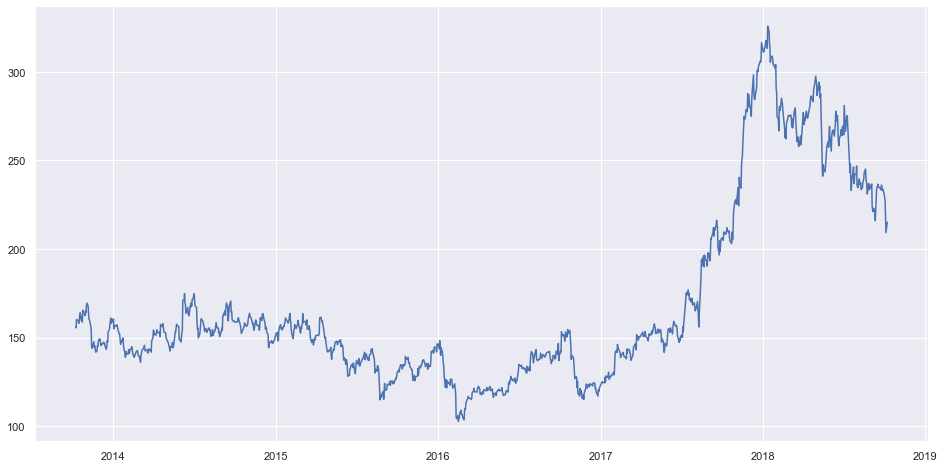

In [51]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [52]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [53]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [54]:
new_data.shape, train.shape, valid.shape

((1235, 2), (987, 2), (248, 2))

In [55]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [56]:
#make predictions
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [57]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

104.51415465984348

c:\users\ssshe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ssshe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


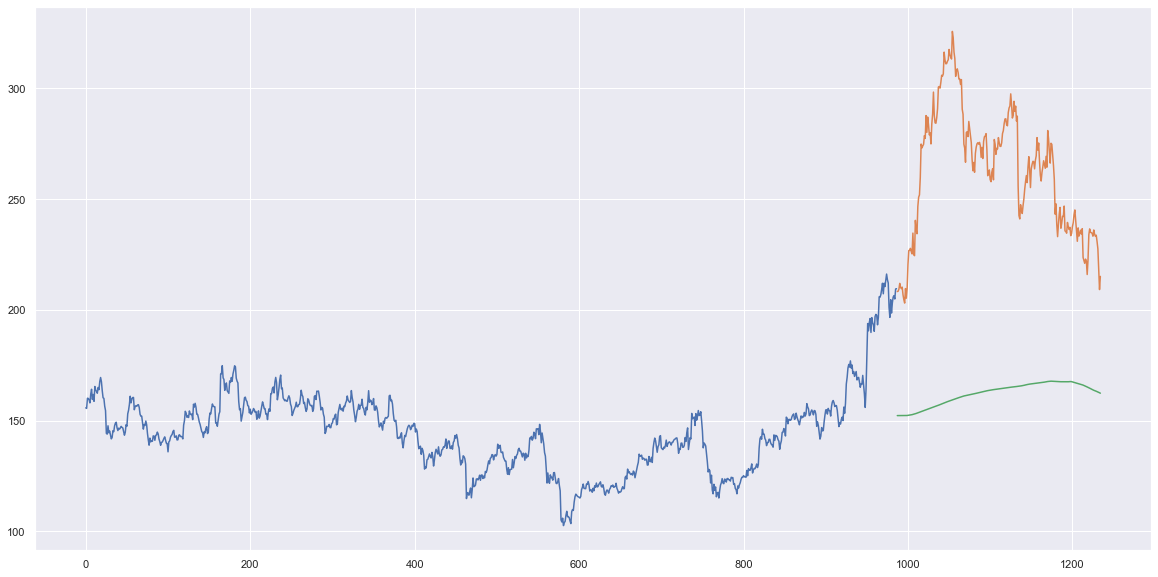

In [58]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

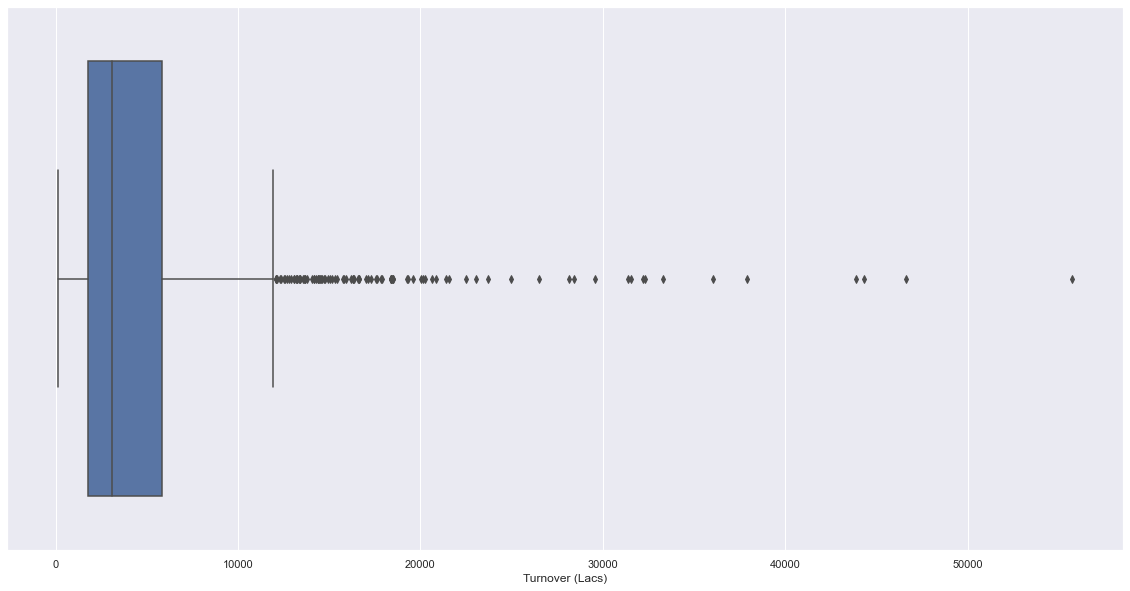

In [59]:
sns.boxplot(x='Turnover (Lacs)', data= df);

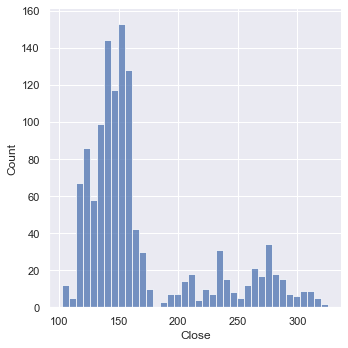

In [62]:
sns.displot(df.Close);

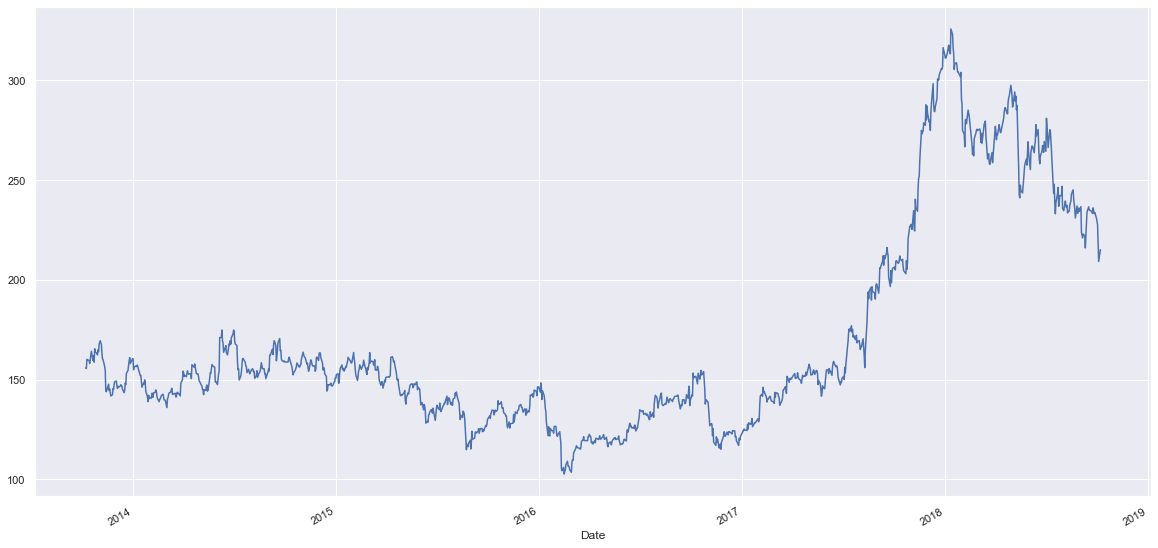

In [63]:
df.Close.plot();

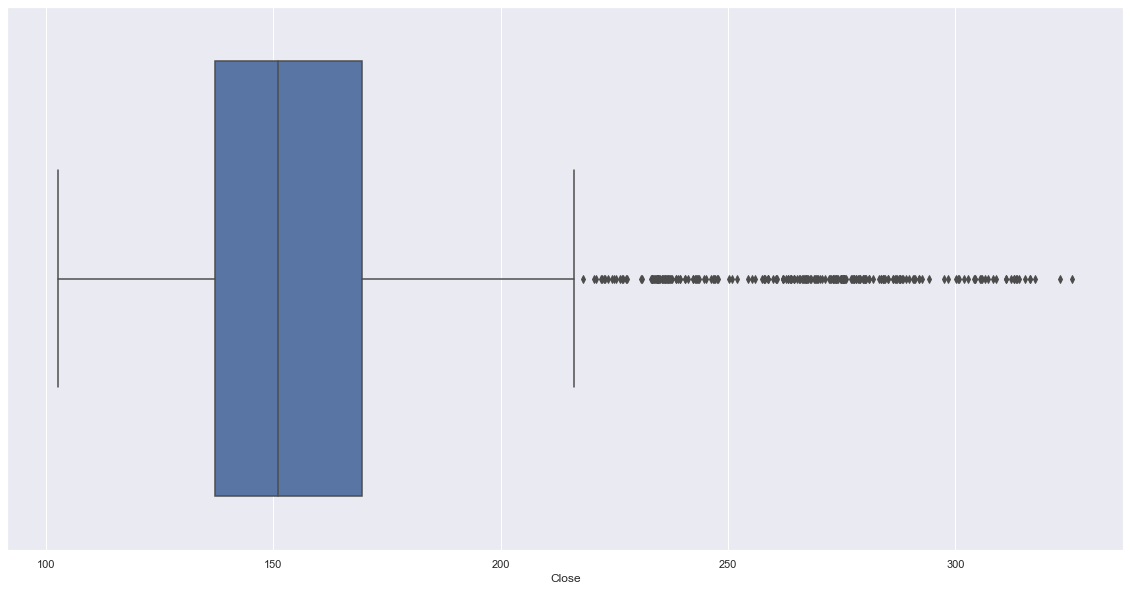

In [65]:
sns.boxplot(x='Close', data= df);

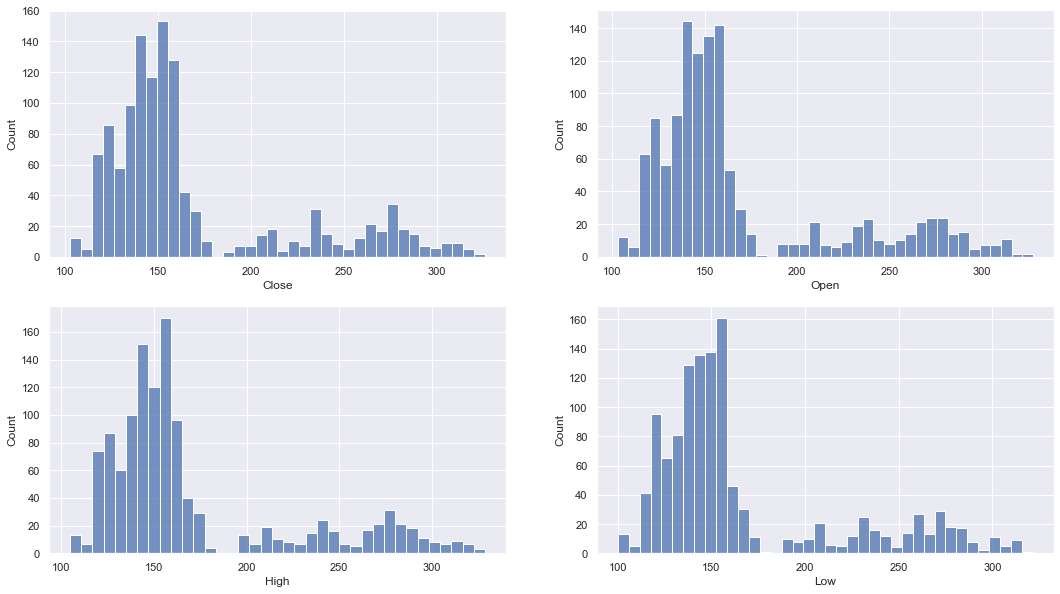

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], x= 'Close', data= df);
sns.histplot(ax=axes[0, 1], x= 'Open', data= df);
sns.histplot(ax=axes[1, 0], x= 'High', data= df);
sns.histplot(ax=axes[1, 1], x= 'Low', data= df);

Text(0, 0.5, 'Close')

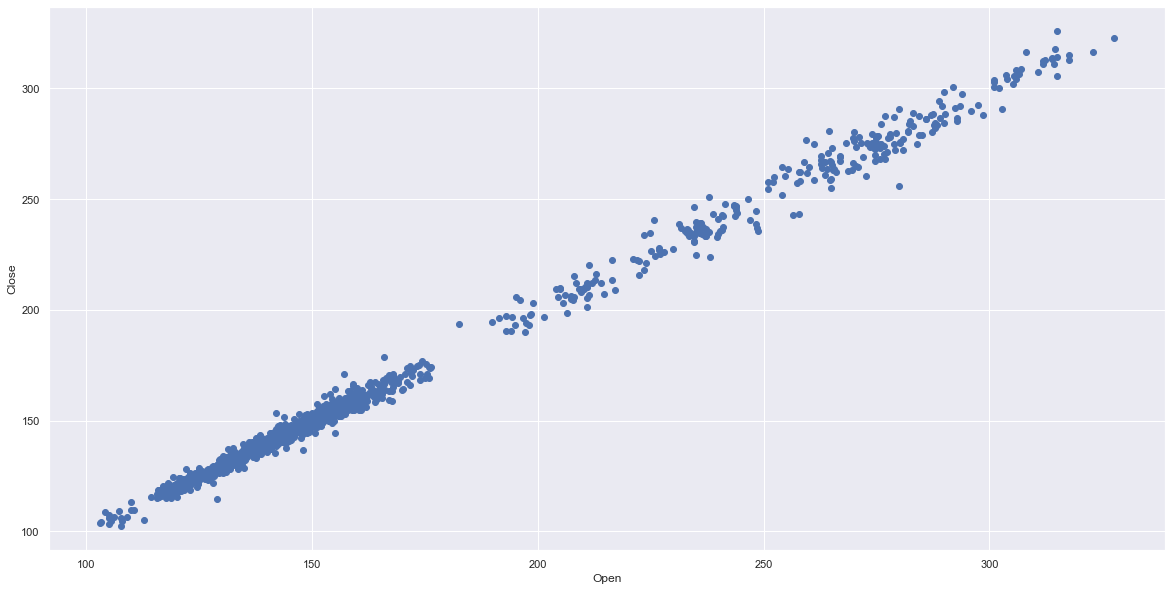

In [72]:
plt.scatter(df.Open, df.Close);
plt.xlabel("Open")
plt.ylabel("Close")

In [73]:
df.Close.value_counts()

154.85    5
153.10    5
144.55    5
147.50    5
124.45    5
         ..
136.80    1
144.45    1
122.30    1
128.75    1
270.70    1
Name: Close, Length: 893, dtype: int64

In [74]:
df.Open.value_counts()

157.00    7
148.00    6
155.00    6
143.00    6
142.00    6
         ..
127.85    1
281.00    1
154.80    1
165.70    1
126.95    1
Name: Open, Length: 799, dtype: int64

In [75]:
# drop "Close" and "Open"
df.drop(["Close" , "Open"], axis=1, inplace=True)
df.head()

,Date,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,
2018-10-08,2018-10-08,222.25,206.85,216.00,4642146.0,10062.83
2018-10-05,2018-10-05,218.60,205.90,210.25,3519515.0,7407.06
2018-10-04,2018-10-04,227.80,216.15,217.25,1728786.0,3815.79
2018-10-03,2018-10-03,237.50,225.75,226.45,1708590.0,3960.27
2018-10-01,2018-10-01,234.60,221.05,230.30,1534749.0,3486.05
